In [3]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import os
import tifffile
import pandas as pd

In [4]:
%matplotlib inline
mpl.rcParams['figure.figsize']=(10,8)
import mpld3
mpld3.enable_notebook()

(1746, 16122)

In [78]:
def entropy(signal):
        '''
        function returns entropy of a signal
        signal must be a 1-D numpy array
        '''
        lensig=signal.size
        symset=list(set(signal))
        numsym=len(symset)
        propab=[np.size(signal[signal==i])/(1.0*lensig) for i in symset]
        ent=np.sum([p*np.log2(1.0/p) for p in propab])
        return ent

def SquashCubeY(data,numbins=100):
    def convert_property_to_dict(property):
    
        prop_dict = {    'centroid_row'       :  property.centroid[0],          # 0D:  location
                         'centroid_col'       :  property.centroid[1],                     

                         'diameter_equivalent':  property.equivalent_diameter,  # 1D
                         'length_minor_axis'  :  property.minor_axis_length, 
                         'length_major_axis'  :  property.major_axis_length,
                         'ratio_eccentricity' :  property.eccentricity,
                         'perimeter'          :  property.perimeter,
                         'orientation'        :  property.orientation,          # ranges from -pi/2 to pi/2 

                         'area'               :  property.area,                 # 2D
                         'area_convex'        :  property.convex_area,
                         'area_filled'        :  property.filled_area,
                         'box_min_row'        :  property.bbox[0],
                         'box_max_row'        :  property.bbox[2],
                         'box_min_col'        :  property.bbox[1],
                         'box_max_col'        :  property.bbox[3],
                         'ratio_extent'       :  property.extent,
                         'ratio_solidity'     :  property.solidity}           

                     
        return prop_dict
    import skimage as si
    from skimage.measure import regionprops,label
    N,M = data.shape
    
    minval = np.min(data[data>0])
    maxval = np.percentile(data[data>0],99)
    medval = np.median(data[data>0])
    stdval = np.median(data[data>0])
    
    threshhold = np.percentile(data[data>0],85)
    label_image = label(data>threshhold,background=0)
    
    props = regionprops(label_image)
    prop_list = [convert_property_to_dict(prop) for prop in props]
    df= pd.DataFrame(prop_list)
    
    bins = np.linspace(0,data.shape[1],numbins+1)
    groups = df.groupby(np.digitize(df.centroid_col,bins))

    vals = groups.quantile(.9)['area'].values
    x= (bins[0:-1]+bins[1:])/2
    plt.plot(x,vals)
    return df
def SquashCubeY2(data,numbins=100):
 
    import skimage as si
    from skimage.measure import regionprops,label
    N,M = data.shape
    
    numbins2=7
    bins = np.int32(np.linspace(0,data.shape[1],numbins+1))
    bins2 = np.int32(np.linspace(0,data.shape[0],numbins2+1))
    print bins2.shape
    vals = np.zeros(numbins)
    
    bot = np.percentile(data,1)
    top = np.percentile(data,99)
    
    for i in range(numbins):
        temp_vals = np.zeros(numbins2)
        for j in range(numbins2):
            
            data_cut=data[bins2[j]:bins2[j+1],bins[i]:bins[i+1]]
            data_cut=np.ravel(data_cut[data_cut>bot])
            e = entropy(data_cut)
       
            temp_vals[j] = entropy(data_cut)
        vals[i]=np.median(temp_vals)
        
        #data_cut=data_cut[data_cut>bot]
        #data_cut=np.ravel(data_cut[data_cut<top])
        
        #e=entropy(data_cut)
        
        #vals[i]=e
        
    x= (bins[0:-1]+bins[1:])/2
    plt.plot(x,vals)
    return vals

(8,)


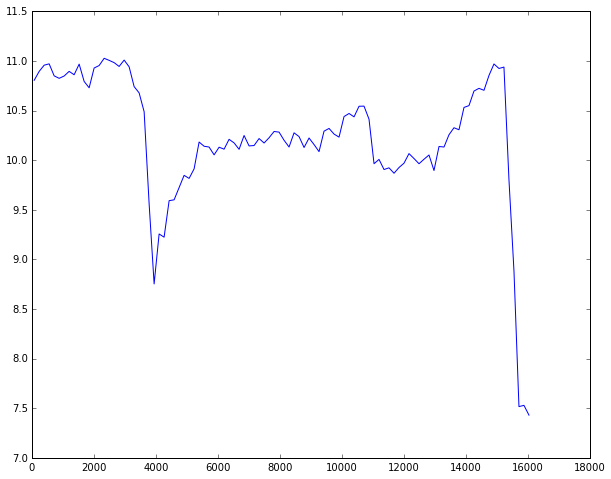

In [79]:
filename = 'example_syn1.tif'
data = tifffile.imread(filename)
df=SquashCubeY2(data)

(8,)


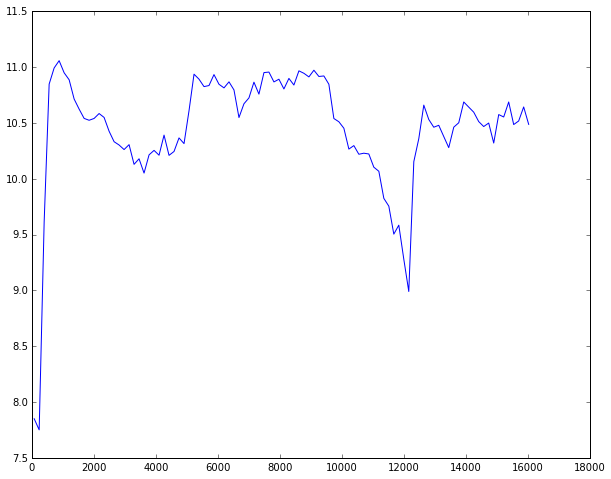

In [80]:
filename = 'S05_W05_slice1.tif'
data = tifffile.imread(filename)
df=SquashCubeY2(data)


In [50]:
np.percentile(data,95)



3489.0

In [17]:
len(prop_list)

124226

In [61]:
areas=np.array([prop['area'] for prop in props])

(array([ 66540.,  22282.,  10396.,   6105.,   3927.,   2729.,   1970.,
          1493.,   1114.,    913.,    810.,    671.,    528.,    447.,
           378.,    336.,    277.,    258.,    233.]),
 array([  0,  10,  20,  30,  40,  50,  60,  70,  80,  90, 100, 110, 120,
        130, 140, 150, 160, 170, 180, 190]),
 <a list of 19 Patch objects>)

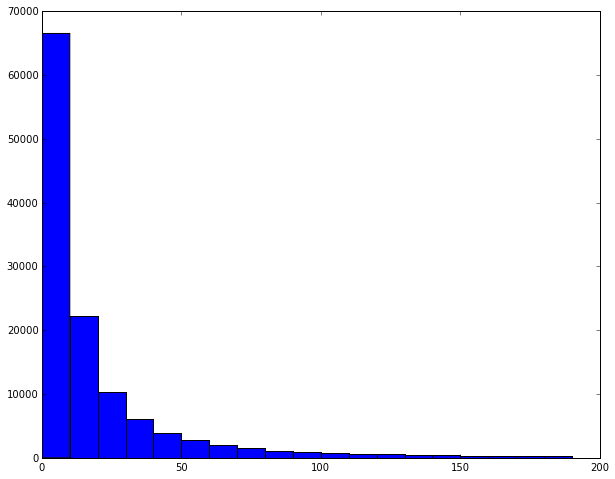

In [29]:
f,ax = plt.subplots()
ax.hist(df.area,bins=np.arange(0,200,10))

In [19]:
df

,area,area_convex,area_filled,box_max_col,box_max_row,box_min_col,box_min_row,centroid_col,centroid_row,diameter_equivalent,length_major_axis,length_minor_axis,orientation,perimeter,ratio_eccentricity,ratio_extent,ratio_solidity
0,98,126,98,14463,40,14449,27,14455.653061,33.489796,11.170384,14.170577,10.892886,-0.985767,49.420310,0.639613,0.538462,0.777778
1,41,46,41,14488,33,14475,27,14480.439024,29.487805,7.225152,13.841992,3.818547,-0.361959,28.727922,0.961196,0.525641,0.891304
2,13,13,13,14491,31,14486,27,14487.846154,28.384615,4.068429,5.376797,2.993306,-0.641033,11.071068,0.830708,0.650000,1.000000
3,96,129,99,14546,42,14533,27,14539.145833,33.218750,11.055813,14.187128,11.200573,-1.444295,54.319805,0.613766,0.492308,0.744186
4,54,73,54,14637,33,14619,27,14630.537037,28.944444,8.291860,17.553356,5.506984,-0.229403,33.520815,0.949513,0.500000,0.739726
5,4,4,4,14644,28,14640,27,14641.500000,27.000000,2.256758,4.472136,0.000000,-0.000000,2.000000,1.000000,1.000000,1.000000
6,3,3,3,14658,29,14656,27,14656.333333,27.333333,1.954410,2.309401,1.333333,0.785398,3.414214,0.816497,0.750000,1.000000
7,11,11,11,14678,30,14672,27,14675.000000,27.545455,3.742410,6.235065,2.412091,-0.179853,8.621320,0.922139,0.611111,1.000000
8,421,720,421,14725,61,14686,27,14704.897862,43.990499,23.152405,46.914784,18.005897,0.810472,183.231493,0.923416,0.317496,0.584722
9,376,613,376,14754,52,14724,27,14737.343085,38.861702,21.880084,29.642259,25.588360,-0.480895,158.124892,0.504795,0.501333,0.613377


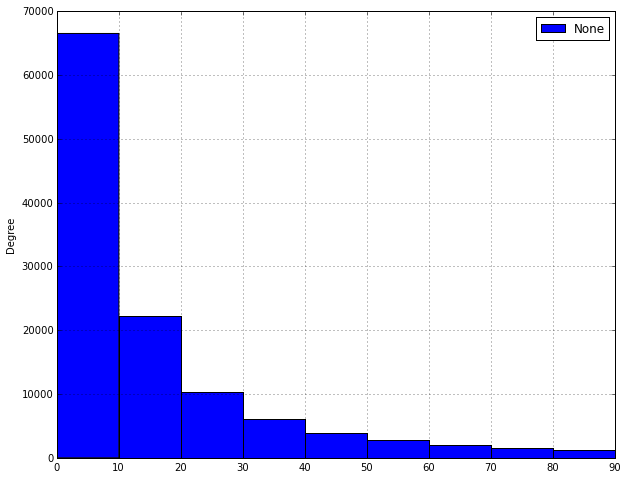

In [30]:
df.plot(kind='hist',y='area',bins=np.arange(0,100,10))

In [32]:
df.quantile(.9,'area')

area                      59.000000
area_convex               73.000000
area_filled               59.000000
box_max_col            14076.000000
box_max_row             1553.000000
box_min_col            14071.000000
box_min_row             1548.000000
centroid_col           14072.658333
centroid_row            1549.733420
diameter_equivalent        8.667245
length_major_axis         13.163340
length_minor_axis          7.062147
orientation                0.890582
perimeter                 33.313708
ratio_eccentricity         0.964940
ratio_extent               1.000000
ratio_solidity             1.000000
dtype: float64

In [66]:
print bins.shape,groups.quantile(.9)['area'].values.shape

(101,) (100,)


In [1]:
plt.plot((bins[0:-1]+bins[1:])/2,)

NameError: name 'plt' is not defined

In [58]:
len(groups),numbins

(100, 100)